#Dependencias

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.utils import shuffle

#Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto Final Idealista/MDS_Final-Project _Leo/00_Data-sets/df_madrid_model_4.csv', sep=',', encoding='utf8')
df.head()


,ASSETID,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASLIFT,ISDUPLEX,CADCONSTRUCTIONYEAR,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LOCATIONNAME,UNIT_PRICE_LOG,LOCATION_MEAN_UNITPRICE_log
0,A17825343908943069115,78,2,1,0,0,1983,0,0,1,5.210162,0.374608,2.352926,12 de Octubre-Orcasur,7.568326,7.435673
1,A10714356998750721240,117,2,1,0,0,1983,0,0,1,5.429355,0.674142,2.627941,12 de Octubre-Orcasur,7.189006,7.435673
2,A7078037284853073227,127,3,1,0,0,1986,0,0,1,5.488692,0.820984,2.719531,12 de Octubre-Orcasur,7.187532,7.435673
3,A10309369899845173928,117,2,1,0,0,1983,0,0,1,5.319828,0.703539,2.536762,12 de Octubre-Orcasur,7.263575,7.435673
4,A15045786080545267105,122,3,2,0,0,1986,0,0,1,5.668336,0.874154,2.885502,12 de Octubre-Orcasur,7.296691,7.435673


In [ ]:
resultados_unicos = df['LOCATIONNAME'].nunique()

print("Resultados únicos en la columna 'Columna':", resultados_unicos)

Resultados únicos en la columna 'Columna': 135


#Dataset Split


In [ ]:
# Partición del data set usando la función pop
X = df.drop(['ASSETID', 'LOCATIONNAME'], axis=1)
y = X.pop('UNIT_PRICE_LOG')

In [ ]:
#Confirmamos el tamaño del modelo
X.shape, y.shape

((74213, 13), (74213,))

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Random_Forest


###Random Forest cross validation K-Folds + Random Search

**Random Search:**
Descripción: El usuario establece un número de iteraciones para probar el modelo y, a continuación, en cada iteración el algoritmo elige un conjunto aleatorio de parámetros de la cuadrícula (sin reemplazo) y calcula las métricas de pérdida. Cuantas más iteraciones, más probabilidades hay de encontrar los mejores parámetros, pero más tarda en ejecutarse el algoritmo.
Ventajas: El método más rápido de todos, hace un trabajo razonablemente bueno de encontrar cerca de los mejores parámetros. Permite la paralelización (lo que le permite probar varios conjuntos de parámetros al mismo tiempo).
Contras: Establecer muy pocos valores puede llevar a soluciones subóptimas. Es poco probable que encuentre el mejor conjunto de parámetros.


In [ ]:
#Importamos el modelos Random Forest REGRESSOR desde Scikit Learn, el modelo Random Forest CLASSIFIER no es una opción porque nuestro modelo busca devolver un output númerico
from sklearn.ensemble import RandomForestRegressor

In [ ]:

#Importamos el método de optimización de parámetros Random Search
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Creamos el Random Forest vacío
rf_regressor = RandomForestRegressor()

In [ ]:
# Definir la grid de hiperparámetros para la búsqueda aleatoria que se usará posteriormente en con el método Random Search

param_dist = {
    'n_estimators': [50, 75, 100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4, 8, 16],
    'bootstrap': [True, False]
}

#centrarce en el min_lef, y de dos a tres en estimadores y en profundidad

In [ ]:
# Definimos el validador cruzado K-Folds con 10 folds, no estoy seguro si 10 ha de ser el mejor pero he visto que es el estandar
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
#Entrenamos el modelo incluyendo los K-Folds. Nota: está tardando mucho en entrenar, buscar estrategias de optimización

random_search = RandomizedSearchCV(
    rf_regressor, param_distributions=param_dist, n_iter=30, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42, verbose=2)

random_search.fit(X_train, y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 8, 16],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 75, 100, 200,
                                                         300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

El parámetro **`scoring='neg_mean_squared_error'`** en scikit-learn especifica la métrica de evaluación a utilizar cuando se realiza el ajuste de hiperparámetros o la evaluación del modelo. En este caso, `neg_mean_squared_error` significa "Error cuadrático medio negativo".

Esto es lo que significa

**Error Cuadrático Medio (MSE):** MSE es una métrica común utilizada para problemas de regresión. Mide la media de las diferencias al cuadrado entre los valores predichos y los valores reales. El MSE cuantifica la distancia entre las predicciones del modelo y los valores reales. Los valores de MSE más bajos indican un mejor rendimiento del modelo.

**MSE negativo:** Scikit-learn normalmente interpreta la puntuación como una métrica de "cuanto mayor, mejor", lo que significa que los valores más altos son mejores. Sin embargo, para métricas de error como MSE, los valores más bajos son mejores. Para alinearse con la convención de scikit-learn, puede utilizar el negativo de MSE como la métrica de puntuación. Esto significa que los valores más altos (menos negativos) indican un mejor rendimiento.

Por lo tanto, cuando se establece` scoring='neg_mean_squared_error'`, se le está diciendo a scikit-learn que utilice el MSE negativo como métrica de evaluación. Durante el ajuste de hiperparámetros, la biblioteca tratará de encontrar hiperparámetros que maximicen este MSE negativo, lo que significa encontrar hiperparámetros que minimicen el MSE, resultando en un mejor modelo.

Alternativas:

`scoring='r2'`
`scoring='neg_mean_absolute_error'`
`scoring='neg_mean_squared_error'`
`scoring='neg_root_mean_squared_error'`
`scoring='neg_mean_absolute_percentage_error'`

Custom Scoring Functions: You can define custom scoring functions that suit your specific needs. These functions should accept true labels and predicted labels as input and return a numeric value. You can then use these custom functions with the make_scorer function from sklearn.metrics.

`from sklearn.metrics import make_scorer`
`custom_scorer = make_scorer(custom_scoring_function)`




In [ ]:
# Obtenemos el mejor modelo del Random Search
best_rf_model_RS = random_search.best_estimator_

In [ ]:
# Print the optimal parameters
print("Optimal Parameters:")
print(random_search.best_params_)

Optimal Parameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


V2: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [ ]:
# Evaluate the model on the test set
y_pred = best_rf_model_RS.predict(X_test)

In [ ]:
# Calculate and print RMSE, MAE, R2 on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [ ]:
# Calculamos RMSE, MAPE, and MEDAPE. CONFIRMAR ESTE PASO CON PELAYO

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)


In [ ]:
# IMPRIMIMOS LAS MÉTRICAS

print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE (Test): {mae_test:.2f}")
print(f"R2 (Test): {r2_test:.2f}")

RMSE (Test): 0.19
MAE (Test): 0.13
R2 (Test): 0.85


### Random forest cross validation K-Folds + Bayesian Search  

Descripción: En la búsqueda bayesiana, el algoritmo aprende de los resultados de las iteraciones anteriores para elegir los valores que tienen más probabilidades de producir soluciones óptimas
Ventajas: Aprende de las iteraciones anteriores, por lo que converge en la solución correcta más rápidamente.
Contras: (Generalmente) no funciona bien con la paralelización, por lo que tarda mucho más en encontrar la solución. Como con todos los métodos bayesianos, existe el riesgo de converger en un máximo local (en lugar de global).

El código es más complicado y, debido a la falta de paralelización, es bastante lento. Además, GridSearch garantiza encontrar una solución "más óptima" que Bayesian (ya que prueba todos los conjuntos de valores), aunque en mucho más tiempo.

In [ ]:
! pip install scikit-optimize
from skopt import BayesSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Definir el modelo regresor Random Forest
rf_regressor = RandomForestRegressor()

In [ ]:
# Definir el espacio de búsqueda de hiperparámetros para la optimización bayesiana.
param_space = {
    'n_estimators': (50, 300),         # Number of trees
    'max_features': (0.1, 1.0),         # Fraction of features to consider for split
    'max_depth': (1, 50),               # Maximum depth of the tree
    'min_samples_split': (2, 10),       # Minimum samples required to split an internal node
    'min_samples_leaf': (4, 16),         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]          # Whether to bootstrap samples
}

In [ ]:
# Definir K-Folds cross-validator con 10 pliegues
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Realizar BayesianOptimization con validación cruzada de K folds
bayesian_search = BayesSearchCV(
    rf_regressor, param_space, cv=kf, n_iter=30, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2, random_state=42)

bayesian_search.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

BayesSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
              estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
              random_state=42, scoring='neg_mean_squared_error',
              search_spaces={'bootstrap': [True, False], 'max_depth': (1, 50),
                             'max_features': (0.1, 1.0),
                             'min_samples_leaf': (4, 16),
                             'min_samples_split': (2, 10),
                             'n_estimators': (50, 300)},
              verbose=2)

In [ ]:
# Obtener el mejor modelo de la Búsqueda Bayesiana
best_rf_model_BS = bayesian_search.best_estimator_

In [ ]:
# Imprime los parámetros óptimos
print("Optimal Parameters:")
print(bayesian_search.best_params_)

Optimal Parameters:
OrderedDict([('bootstrap', False), ('max_depth', 34), ('max_features', 0.6857565539493793), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 300)])


v3_2:{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


v3: OrderedDict([('bootstrap', False), ('max_depth', 34), ('max_features', 0.6857565539493793), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 300)])


V2: OrderedDict([('bootstrap', False), ('max_depth', 50), ('max_features', 0.46387000369232245), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 300)])


In [ ]:
# Evaluar el modelo en el conjunto de pruebas
y_pred = best_rf_model_BS.predict(X_test)

In [ ]:
# Calcular e imprimir RMSE, MAE, R2 en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
print(f"MAE (Test): {mae_test:.2f}")
print(f"R2 (Test): {r2_test:.2f}")

RMSE (Test): 0.19
MAE (Test): 0.13
R2 (Test): 0.85


#XGBoost

In [ ]:
! pip install scikit-optimize
from skopt import BayesSearchCV

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor
from skopt import BayesSearchCV

# Crear el estimador XGBoost
xgb_regressor = XGBRegressor()

# Definir el espacio de hiperparámetros
param_space_XGB = {
    'n_estimators': (50, 300),         # Number of trees
    'max_depth': (1, 50),             # Maximum depth of the tree
    'learning_rate': (0.01, 1.0),     # Learning rate
    'min_child_weight': (1, 10),      # Minimum sum of instance weight (hessian) needed in a child
    'subsample': (0.1, 1.0),         # Fraction of samples used for fitting the trees
    'colsample_bytree': (0.1, 1.0),  # Fraction of features used for fitting the trees
    'gamma': (0, 5),                  # Minimum loss reduction required to make a further partition
}


kf_xgb = KFold(n_splits=10, shuffle=True, random_state=42)

# Crear la instancia de BayesSearchCV
bayesian_search_xgb = BayesSearchCV(
    xgb_regressor, param_space_XGB, cv=kf_xgb, n_iter=30, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2, random_state=42)

# Realizar la búsqueda bayesiana en los datos de entrenamiento
bayesian_search_xgb.fit(X_train, y_train)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


BayesSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
              estimator=XGBRegressor(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     in...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
              n_iter=30, n_jobs=-1, random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'colsample_bytree': (0.1, 1.0), 'gamma': (0, 5),
                             'learning_rate': (0.01, 1.0), 'max_depth': (1, 50),
                             'min_child_weight': (1, 10),
                             'n_estimators': (50, 300),
                             'subsample': (0.1, 1.0)},
              verbose=2)

In [ ]:
# Obtener el mejor modelo de la Búsqueda Bayesiana
best_xg_model_BS = bayesian_search_xgb.best_estimator_

In [ ]:
# Imprime los parámetros óptimos
print("Optimal Parameters:")
print(bayesian_search_xgb.best_params_)

Optimal Parameters:
OrderedDict([('colsample_bytree', 0.8311563895216271), ('gamma', 1), ('learning_rate', 0.6020666067370067), ('max_depth', 40), ('min_child_weight', 6), ('n_estimators', 74), ('subsample', 0.7802204795522933)])


OrderedDict([('colsample_bytree', 0.8311563895216271), ('gamma', 1), ('learning_rate', 0.6020666067370067), ('max_depth', 40), ('min_child_weight', 6), ('n_estimators', 74), ('subsample', 0.7802204795522933)])


v1_XGB:


In [ ]:
# Evaluar el modelo en el conjunto de pruebas
y_pred_xgb = best_xg_model_BS.predict(X_test)

In [ ]:
# Calcular e imprimir RMSE, MAE, R2 en el conjunto de prueba
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_test_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_test_xgb = r2_score(y_test, y_pred_xgb)


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular el error porcentual
diferencias_absolutas_xgb = abs(y_pred_xgb - y_test)
error_porcentual_xgb = (diferencias_absolutas_xgb / y_test) * 100

# Calcular la mediana y la media del error porcentual
error_porcentual_media_xgb = np.mean(error_porcentual_xgb)

print(f"Media del Error Porcentual: {error_porcentual_media_xgb:.2f}%")

Media del Error Porcentual: 1.93%


In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
print(f"MAE (Test): {mae_test_xgb:.2f}")
print(f"R2 (Test): {r2_test_xgb:.2f}")
print(f"rmse_test_xgb: {rmse_test_xgb:.2f}")

MAE (Test): 0.15
R2 (Test): 0.82
rmse_test_xgb: 0.21


#Regresión Lineal

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Crear el estimador de regresión lineal
linear_regressor = LinearRegression()

# Crear un objeto StandardScaler para normalizar las características
scaler = StandardScaler()

# Crear un pipeline que incluye la normalización y la regresión lineal
pipeline = Pipeline([
    ('scaler', scaler),
    ('linear_regressor', linear_regressor)
])

# Definir el espacio de hiperparámetros (en este caso, no hay muchos hiperparámetros)
param_space = {
    'linear_regressor__fit_intercept': [True, False],  # Incluir o no el término de intercepción
}

# Crear la instancia de GridSearchCV
kf_rl = KFold(n_splits=5, shuffle=True, random_state=42)  # K-fold cross-validation
grid_search = GridSearchCV(
    pipeline, param_space, cv=kf_rl, scoring='neg_mean_squared_error')

# Realizar la búsqueda en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_model_RL = grid_search.best_estimator_
best_params_RL = grid_search.best_params_

# Calcular el error cuadrado medio en los datos de prueba
y_pred_rl = best_model_RL.predict(X_test)
mse_rl = mean_squared_error(y_test, y_pred_rl)



In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular el error porcentual
diferencias_absolutas_rl = abs(y_pred_rl - y_test)
error_porcentual_rl = (diferencias_absolutas_rl / y_test) * 100

# Calcular la mediana y la media del error porcentual
error_porcentual_mediana_rl = np.median(error_porcentual_rl)
error_porcentual_media_rl = np.mean(error_porcentual_rl)

print(f"Media del Error Porcentual: {error_porcentual_media_rl:.2f}%")


Media del Error Porcentual: 2.17%


In [ ]:
from sklearn.metrics import r2_score

# Calcular el R^2 en los datos de prueba
r2_rl = r2_score(y_test, y_pred_rl)

print(f"MSE del modelo: {mse_rl:.4f}")
print(f"R^2 del modelo: {r2_rl:.4f}")
print(f"Media del Error Porcentual: {error_porcentual_media_rl:.2f}%")


MSE del modelo: 0.0548
R^2 del modelo: 0.7725
Media del Error Porcentual: 2.17%


#Modelo Final

In [ ]:
#Importamos el modelos Random Forest REGRESSOR desde Scikit Learn, el modelo Random Forest CLASSIFIER no es una opción porque nuestro modelo busca devolver un output númerico
from sklearn.ensemble import RandomForestRegressor

##Iteración1

In [ ]:
# Creamos el Random Forest vacío
rf_regressor = RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=300,
                                 max_depth=50,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='sqrt',
                                 bootstrap= True,
                                 random_state=42)
# Entrenar el modelo con tus datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)


In [ ]:
# Calcular e imprimir RMSE, MAE, R2 en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE (Test): {mae_test:.2f}")
print(f"R2 (Test): {r2_test:.2f}")

RMSE (Test): 0.20
MAE (Test): 0.14
R2 (Test): 0.83


##Iteración2

In [ ]:
# Creamos el Random Forest vacío
rf_regressor = RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=250,
                                 max_depth=50,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='sqrt',
                                 bootstrap= True,
                                 random_state=42)
# Entrenar el modelo con tus datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)


In [ ]:
# Calcular e imprimir RMSE, MAE, R2 en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE (Test): {mae_test:.2f}")
print(f"R2 (Test): {r2_test:.2f}")

RMSE (Test): 0.20
MAE (Test): 0.14
R2 (Test): 0.83


## Iteración3

In [ ]:
# Creamos el Random Forest vacío
rf_regressor = RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=300,
                                 max_depth=50,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features=0.46,
                                 bootstrap= False,
                                 random_state=42)
# Entrenar el modelo con tus datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)


In [ ]:
# Calcular e imprimir RMSE, MAE, R2 en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE (Test): {mae_test:.2f}")
print(f"R2 (Test): {r2_test:.2f}")

RMSE (Test): 0.19
MAE (Test): 0.13
R2 (Test): 0.84


##Iteración4

In [ ]:
# Creamos el Random Forest vacío
rf_regressor = RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=400,
                                 max_depth=10,
                                 min_samples_split=3,
                                 min_samples_leaf=5,
                                 max_features=0.46,
                                 bootstrap= False,
                                 random_state=42)
# Entrenar el modelo con tus datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)


In [ ]:
# Calcular e imprimir RMSE, MAE, R2 en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [ ]:
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE (Test): {mae_test:.2f}")
print(f"R2 (Test): {r2_test:.2f}")

RMSE (Test): 0.22
MAE (Test): 0.16
R2 (Test): 0.80


##Modelo Final

In [ ]:
# Creamos el Random Forest vacío
rf_regressor = RandomForestRegressor()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200,
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=4,
                                 max_features='sqrt',
                                 bootstrap= False,
                                 random_state=42)
# Entrenar el modelo con tus datos de entrenamiento
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)


In [ ]:

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
error_porcentual = (abs(np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test)) * 100

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular el error porcentual
diferencias_absolutas = abs(y_pred - y_test)
error_porcentual = (diferencias_absolutas / y_test) * 100

# Calcular la mediana y la media del error porcentual
error_porcentual_mediana = np.median(error_porcentual)
error_porcentual_media = np.mean(error_porcentual)

print(f"Mediana del Error Porcentual: {error_porcentual_mediana:.2f}%")
print(f"Media del Error Porcentual: {error_porcentual_media:.2f}%")


Mediana del Error Porcentual: 1.22%
Media del Error Porcentual: 1.69%


In [ ]:
# Calcular e imprimir RMSE, MAE, R2 en el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
error_porcentual = (abs(np.exp(y_test) - np.exp(y_pred)) / np.exp(y_test)) * 100

In [ ]:
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE (Test): {mae_test:.2f}")
print(f"R2 (Test): {r2_test:.2f}")

#Estadísticas por Barrio

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes
!pip install --upgrade rtree
!pip install --upgrade pygeos

import rtree
import pygeos
import geopandas
from geopandas import GeoDataFrame
from shapely import wkt
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [ ]:
pip install geopandas matplotlib


Uno el Location name

In [ ]:
# Unir la columna 'LOCATIONNAME' a tus datos X
X['LOCATIONNAME'] = df['LOCATIONNAME']

# Dividir los datos en grupos según la variable categórica 'LOCATIONNAME'
grupos = X.groupby('LOCATIONNAME')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Crear una lista única de valores de 'LOCATIONNAME'
ubicaciones_unicas = df['LOCATIONNAME'].unique()

# Crear un diccionario para almacenar las estadísticas por ubicación
estadisticas_por_ubicacion = {}

# Iterar a través de las ubicaciones únicas y calcular estadísticas para cada una
for ubicacion in ubicaciones_unicas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)  # Elimino temporalmente 'LOCATIONNAME'
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    # Hacer predicciones para la ubicación actual
    y_pred_ubicacion = rf_model.predict(datos_ubicacion)

    # Calcular métricas de evaluación (por ejemplo, error cuadrado medio y R^2)
    mse = np.exp(mean_squared_error(y_ubicacion, y_pred_ubicacion))
    r2 = r2_score(y_ubicacion, y_pred_ubicacion)

    # Calcular el error porcentual para la ubicación actual
    error_porcentual = (abs(np.exp(y_ubicacion) - np.exp(y_pred_ubicacion)) / np.exp(y_ubicacion)) * 100

    # Calcular el MPE para la ubicación actual
    mpe = np.mean(error_porcentual)

    # Almacenar las estadísticas en el diccionario
    estadisticas_por_ubicacion[ubicacion] = {'MSE': mse, 'R^2': r2, 'MPE': mpe}

    # Agregar temporalmente de nuevo 'LOCATIONNAME'
    datos_ubicacion['LOCATIONNAME'] = ubicacion

# Imprimir las estadísticas para cada ubicación
for ubicacion, estadisticas in estadisticas_por_ubicacion.items():
    print(f'Ubicación: {ubicacion}')
    print(f'MSE: {estadisticas["MSE"]:.4f}')
    print(f'R^2: {estadisticas["R^2"]:.4f}')
    print(f'MPE: {estadisticas["MPE"]:.2f}%')
    print()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Crear una lista única de valores de 'LOCATIONNAME'
ubicaciones_unicas = df['LOCATIONNAME'].unique()

# Crear un diccionario para almacenar las estadísticas por ubicación
estadisticas_por_ubicacion = {}

# Iterar a través de las ubicaciones únicas y calcular estadísticas para cada una
for ubicacion in ubicaciones_unicas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)  # Elimino temporalmente 'LOCATIONNAME'
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    # Obtener el número de muestras en la ubicación actual
    poblacion_muestras = len(y_ubicacion)

    # Hacer predicciones para la ubicación actual
    y_pred_ubicacion = rf_model.predict(datos_ubicacion)

    # Calcular métricas de evaluación (por ejemplo, error cuadrado medio y R^2)
    mse = np.exp(mean_squared_error(y_ubicacion, y_pred_ubicacion))
    r2 = r2_score(y_ubicacion, y_pred_ubicacion)

    # Calcular el error porcentual para la ubicación actual
    error_porcentual = (abs(np.exp(y_ubicacion) - np.exp(y_pred_ubicacion)) / np.exp(y_ubicacion)) * 100

    # Calcular el MPE para la ubicación actual
    mpe = np.median(error_porcentual)  # Cambio la media por la mediana

    # Eliminar el mínimo y el máximo del error porcentual
    error_porcentual_sin_min_max = error_porcentual[(error_porcentual != np.min(error_porcentual)) & (error_porcentual != np.max(error_porcentual))]

    # Almacenar las estadísticas en el diccionario
    estadisticas_por_ubicacion[ubicacion] = {
        'MSE': mse,
        'R^2': r2,
        'MPE': mpe,
        'Población de Muestras': poblacion_muestras,
        'Mediana Error Porcentual': np.median(error_porcentual_sin_min_max)
    }

    # Agregar temporalmente de nuevo 'LOCATIONNAME'
    datos_ubicacion['LOCATIONNAME'] = ubicacion

# Imprimir las estadísticas para cada ubicación
for ubicacion, estadisticas in estadisticas_por_ubicacion.items():
    print(f'Ubicación: {ubicacion}')
    print(f'MSE: {estadisticas["MSE"]:.4f}')
    print(f'R^2: {estadisticas["R^2"]:.4f}')
    print(f'MPE: {estadisticas["MPE"]:.2f}%')
    print(f'Población de Muestras: {estadisticas["Población de Muestras"]}')
    print(f'Mediana Error Porcentual: {estadisticas["Mediana Error Porcentual"]:.2f}%')
    print()


Ubicación: 12 de Octubre-Orcasur
MSE: 1.0222
R^2: 0.8053
MPE: 8.08%
Población de Muestras: 212
Mediana Error Porcentual: 8.08%

Ubicación: Abrantes
MSE: 1.0167
R^2: 0.8140
MPE: 7.11%
Población de Muestras: 565
Mediana Error Porcentual: 7.11%

Ubicación: Acacias
MSE: 1.0229
R^2: 0.6833
MPE: 5.95%
Población de Muestras: 662
Mediana Error Porcentual: 5.95%

Ubicación: Adelfas
MSE: 1.0143
R^2: 0.6532
MPE: 5.42%
Población de Muestras: 397
Mediana Error Porcentual: 5.42%

Ubicación: Aeropuerto
MSE: 1.0237
R^2: 0.6320
MPE: 9.21%
Población de Muestras: 33
Mediana Error Porcentual: 9.21%

Ubicación: Alameda de Osuna
MSE: 1.0107
R^2: 0.6463
MPE: 5.32%
Población de Muestras: 242
Mediana Error Porcentual: 5.32%

Ubicación: Almagro
MSE: 1.0189
R^2: 0.6759
MPE: 6.80%
Población de Muestras: 942
Mediana Error Porcentual: 6.80%

Ubicación: Almendrales
MSE: 1.0258
R^2: 0.8153
MPE: 8.14%
Población de Muestras: 369
Mediana Error Porcentual: 8.14%

Ubicación: Aluche
MSE: 1.0142
R^2: 0.7408
MPE: 5.69%
Pobla

Dataset con las estadísticas para cada modelo

In [ ]:
# Unir la columna 'LOCATIONNAME' a tus datos X
X['LOCATIONNAME'] = df['LOCATIONNAME']

# Dividir los datos en grupos según la variable categórica 'LOCATIONNAME'
grupos = X.groupby('LOCATIONNAME')

In [ ]:
import pandas as pd

# Crear un diccionario para almacenar las estadísticas de los modelos
estadisticas_modelos_por_ubicacion = {}

# Crear una lista única de valores de 'LOCATIONNAME'
ubicaciones_unicas = df['LOCATIONNAME'].unique()

# Iterar a través de las ubicaciones únicas
for ubicacion in ubicaciones_unicas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)  # Elimino temporalmente 'LOCATIONNAME'
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    #Población de muestras
    poblacion_muestras = len(y_ubicacion)

    # Hacer predicciones para la ubicación actual con los tres modelos
    y_pred_rf = rf_model.predict(datos_ubicacion)
    y_pred_xgb = best_xg_model_BS.predict(datos_ubicacion)
    y_pred_rl = best_model_RL.predict(datos_ubicacion)

    # Calcular métricas de evaluación para los tres modelos
    mse_rf = np.exp(mean_squared_error(y_ubicacion, y_pred_rf))
    r2_rf = r2_score(y_ubicacion, y_pred_rf)

    mse_xgb = np.exp(mean_squared_error(y_ubicacion, y_pred_xgb))
    r2_xgb = r2_score(y_ubicacion, y_pred_xgb)

    mse_rl = np.exp(mean_squared_error(y_ubicacion, y_pred_rl))
    r2_rl = r2_score(y_ubicacion, y_pred_rl)

    # Calcular el error porcentual para los tres modelos
    error_porcentual_rf = (abs(np.exp(y_ubicacion) - np.exp(y_pred_rf)) / np.exp(y_ubicacion)) * 100
    error_porcentual_xgb = (abs(np.exp(y_ubicacion) - np.exp(y_pred_xgb)) / np.exp(y_ubicacion)) * 100
    error_porcentual_rl = (abs(np.exp(y_ubicacion) - np.exp(y_pred_rl)) / np.exp(y_ubicacion)) * 100

    # Calcular el MPE para los tres modelos
    mpe_rf = np.median(error_porcentual_rf)
    mpe_xgb = np.median(error_porcentual_xgb)
    mpe_rl = np.median(error_porcentual_rl)

    # Eliminar el mínimo y el máximo del error porcentual
    error_porcentual_rf_sin_min_max = error_porcentual_rf[(error_porcentual_rf != np.min(error_porcentual_rf)) & (error_porcentual_rf != np.max(error_porcentual_rf))]
    error_porcentual_xgb_sin_min_max = error_porcentual_xgb[(error_porcentual_xgb != np.min(error_porcentual_xgb)) & (error_porcentual_xgb != np.max(error_porcentual_xgb))]
    error_porcentual_rl_sin_min_max = error_porcentual_rl[(error_porcentual_rl != np.min(error_porcentual_rl)) & (error_porcentual_rl != np.max(error_porcentual_rl))]

    # Almacenar las estadísticas en el diccionario
    estadisticas_modelos_por_ubicacion[ubicacion] = {
        'MSE_RF': mse_rf,
        'R^2_RF': r2_rf,
        'MPE_RF': mpe_rf,
        'MSE_XGB': mse_xgb,
        'R^2_XGB': r2_xgb,
        'MPE_XGB': mpe_xgb,
        'MSE_RL': mse_rl,
        'R^2_RL': r2_rl,
        'MPE_RL': mpe_rl,
        'Población de Muestras': poblacion_muestras
    }

    # Agregar temporalmente de nuevo 'LOCATIONNAME'
    datos_ubicacion['LOCATIONNAME'] = ubicacion

# Crear un DataFrame a partir del diccionario de estadísticas
df_estadisticas_modelos = pd.DataFrame.from_dict(estadisticas_modelos_por_ubicacion, orient='index')

# Imprimir el DataFrame
print(df_estadisticas_modelos)


                                  MSE_RF    R^2_RF    MPE_RF   MSE_XGB  \
12 de Octubre-Orcasur           1.022164  0.805316  8.075371  1.045425   
Abrantes                        1.016720  0.814028  7.111481  1.036180   
Acacias                         1.022945  0.683325  5.948571  1.036365   
Adelfas                         1.014299  0.653199  5.419968  1.034243   
Aeropuerto                      1.023693  0.632029  9.214182  1.024564   
...                                  ...       ...       ...       ...   
Vinateros                       1.008238  0.668592  5.017058  1.020377   
Virgen del Cortijo - Manoteras  1.010157  0.916072  5.422853  1.020549   
Vista Alegre                    1.019509  0.691153  7.207997  1.038243   
Zofío                           1.019506  0.656958  8.495214  1.041428   
Águilas                         1.013315  0.633095  5.670622  1.028661   

                                 R^2_XGB    MPE_XGB    MSE_RL    R^2_RL  \
12 de Octubre-Orcasur           0.60

In [ ]:
df_estadisticas_modelos.head()

,MSE_RF,R^2_RF,MPE_RF,MSE_XGB,R^2_XGB,MPE_XGB,MSE_RL,R^2_RL,MPE_RL
12 de Octubre-Orcasur,1.022164,0.805316,8.075371,1.045425,0.605492,13.410982,1.096668,0.180523,21.555193
Abrantes,1.016720,0.814028,7.111481,1.036180,0.601403,12.068825,1.080339,0.133340,17.428002
Acacias,1.022945,0.683325,5.948571,1.036365,0.501388,10.328417,1.066991,0.094862,13.814553
Adelfas,1.014299,0.653199,5.419968,1.034243,0.177548,10.601977,1.042621,-0.019537,13.107539
Aeropuerto,1.023693,0.632029,9.214182,1.024564,0.618660,10.645539,1.076967,-0.165179,22.093222


In [ ]:
output_csv_file = 'Resultados de modelos.csv'
df_estadisticas_modelos.to_csv(output_csv_file, index=True)

print(f"DataFrame has been exported to {output_csv_file}.")

DataFrame has been exported to Resultados de modelos.csv.


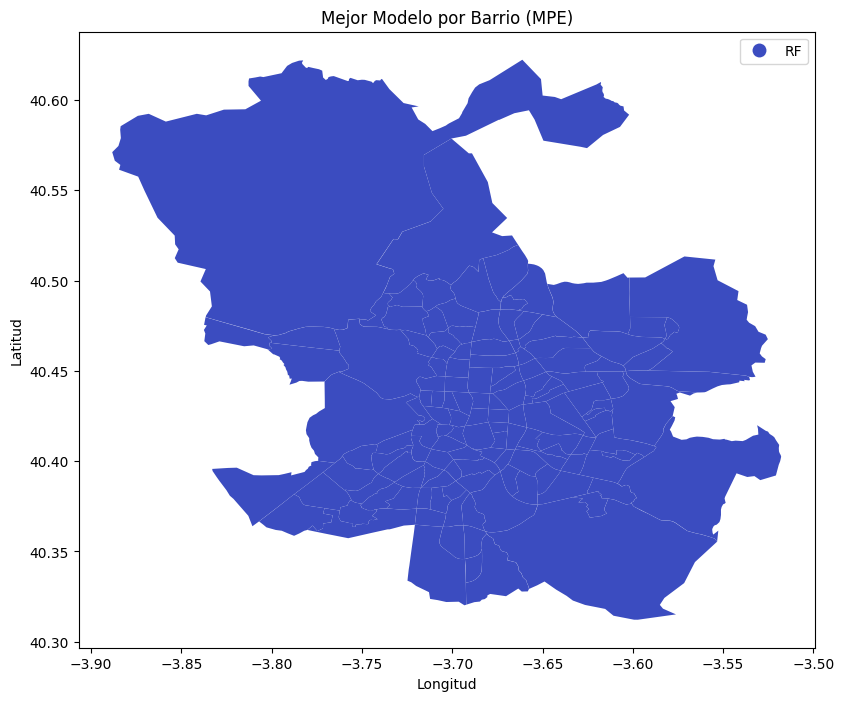

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear un diccionario para almacenar las estadísticas de los modelos
estadisticas_modelos_por_ubicacion = {}

# Crear una lista única de valores de 'LOCATIONNAME'
ubicaciones_unicas = df['LOCATIONNAME'].unique()

# Iterar a través de las ubicaciones únicas
for ubicacion in ubicaciones_unicas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)  # Elimino temporalmente 'LOCATIONNAME'
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    # Hacer predicciones para la ubicación actual con los tres modelos
    y_pred_rf = rf_model.predict(datos_ubicacion)
    y_pred_xgb = best_xg_model_BS.predict(datos_ubicacion)
    y_pred_rl = best_model_RL.predict(datos_ubicacion)

    # Calcular el error porcentual para los tres modelos
    error_porcentual_rf = (abs(np.exp(y_ubicacion) - np.exp(y_pred_rf)) / np.exp(y_ubicacion)) * 100
    error_porcentual_xgb = (abs(np.exp(y_ubicacion) - np.exp(y_pred_xgb)) / np.exp(y_ubicacion)) * 100
    error_porcentual_rl = (abs(np.exp(y_ubicacion) - np.exp(y_pred_rl)) / np.exp(y_ubicacion)) * 100

    # Calcular el MPE para los tres modelos
    mpe_rf = np.median(error_porcentual_rf)
    mpe_xgb = np.median(error_porcentual_xgb)
    mpe_rl = np.median(error_porcentual_rl)

    # Almacenar las estadísticas en el diccionario
    estadisticas_modelos_por_ubicacion[ubicacion] = {
        'MPE_RF': mpe_rf,
        'MPE_XGB': mpe_xgb,
        'MPE_RL': mpe_rl
    }

# Crear un DataFrame a partir del diccionario de estadísticas
df_estadisticas_modelos = pd.DataFrame.from_dict(estadisticas_modelos_por_ubicacion, orient='index')

# Crear un GeoDataFrame a partir de tu DataFrame original de polígonos
gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry=gpd.GeoSeries.from_wkt(df_polygons['WKT']))

# Fusionar el GeoDataFrame con las estadísticas de los modelos
gdf_polygons = gdf_polygons.merge(df_estadisticas_modelos, left_on='LOCATIONNAME', right_index=True)

# Crear una columna que indique cuál es el mejor modelo por MPE
gdf_polygons['Mejor_Modelo'] = gdf_polygons[['MPE_RF', 'MPE_XGB', 'MPE_RL']].idxmin(axis=1).str.replace('MPE_', '')

# Dibujar los polígonos y colorea según el mejor modelo
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_polygons.plot(column='Mejor_Modelo', cmap='coolwarm', legend=True, ax=ax)
plt.title('Mejor Modelo por Barrio (MPE)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


In [ ]:
url = 'https://raw.githubusercontent.com/davidreyblanco/ml-training/master/data/idealista18/data/polygons/Madrid_polygons.csv.gz'
df_polygons = pd.read_csv(url, sep=";")
df_polygons.head()

,LOCATIONID,LOCATIONNAME,WKT,ZONELEVELID
0,0-EU-ES-28-07-001-079-16-002,Conde Orgaz-Piovera,"MULTIPOLYGON(((-3.63014 40.449394,-3.62633 40....",8
1,0-EU-ES-28-07-001-079-16-004,Pinar del Rey,"MULTIPOLYGON(((-3.655102 40.466807,-3.654251 4...",8
2,0-EU-ES-28-07-001-079-21-004,Timón,"MULTIPOLYGON(((-3.581744 40.479725,-3.60157 40...",8
3,0-EU-ES-28-07-001-079-01-001,Palacio,"MULTIPOLYGON(((-3.72044 40.42028,-3.72097 40.4...",8
4,0-EU-ES-28-07-001-079-01-003,Huertas-Cortes,"MULTIPOLYGON(((-3.696488 40.418813,-3.699685 4...",8


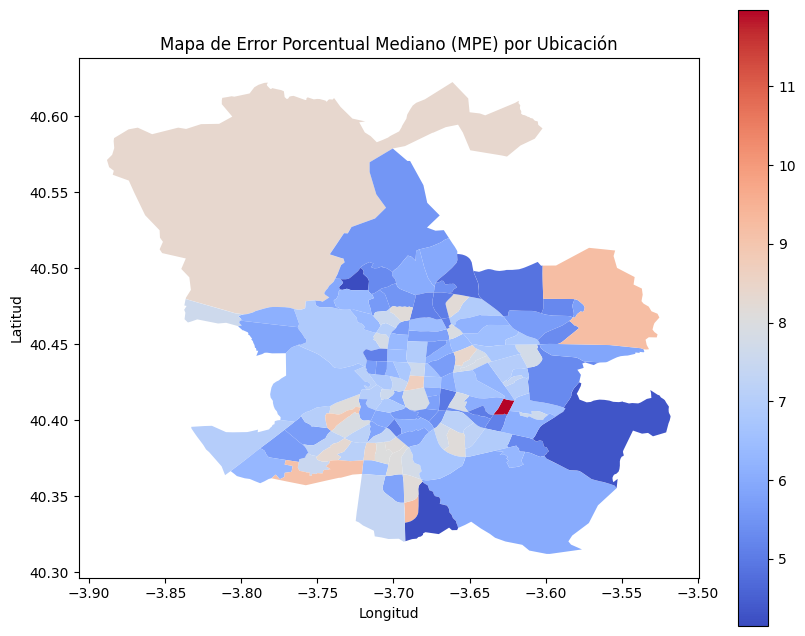

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear un GeoDataFrame a partir de tu DataFrame original
gdf = gpd.GeoDataFrame(df_polygons, geometry=gpd.GeoSeries.from_wkt(df_polygons['WKT']))

# Crear un diccionario para almacenar el MPE por ubicación
mpe_por_ubicacion = {}

# Iterar a través de las ubicaciones únicas y almacenar el MPE en el diccionario
for ubicacion in ubicaciones_unicas:
    mpe = estadisticas_por_ubicacion.get(ubicacion, {}).get('MPE', None)
    mpe_por_ubicacion[ubicacion] = mpe

# Agregar la columna de MPE al GeoDataFrame
gdf['MPE'] = [mpe_por_ubicacion.get(ubicacion, None) for ubicacion in gdf['LOCATIONNAME']]

# Dibujar los polígonos y etiquetar con el MPE
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='MPE', cmap='coolwarm', legend=True, ax=ax)
plt.title('Mapa de Error Porcentual Mediano (MPE) por Ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


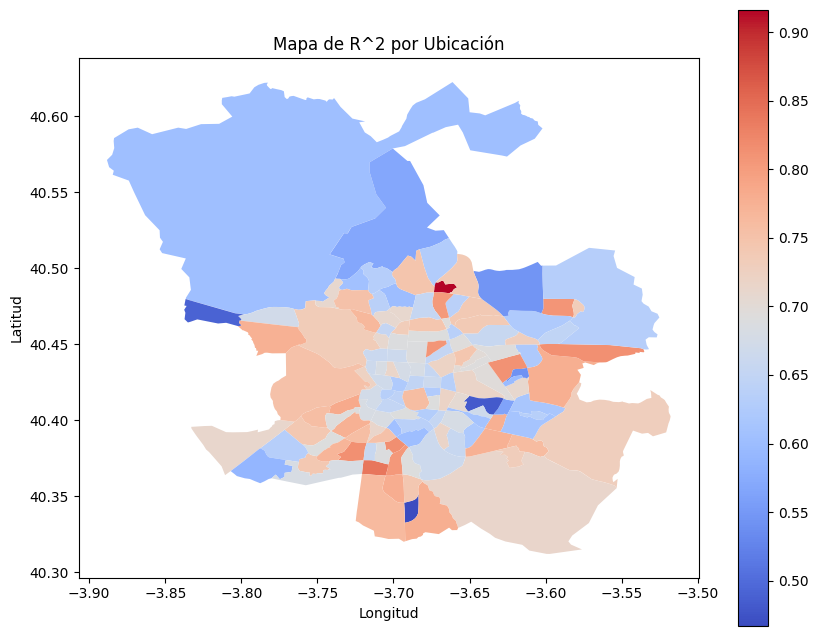

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crea un GeoDataFrame a partir de tu DataFrame original
gdf = gpd.GeoDataFrame(df_polygons, geometry=gpd.GeoSeries.from_wkt(df_polygons['WKT']))

# Agrega la columna de R^2 a tu GeoDataFrame
gdf['R2'] = [estadisticas_por_ubicacion.get(ubicacion, {}).get('R^2', None) for ubicacion in gdf['LOCATIONNAME']]

# Dibuja los polígonos y colorea según los valores de R^2
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='R2', cmap='coolwarm', legend=True, ax=ax)
plt.title('Mapa de R^2 por Ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


#Modelo específico para cada barrio

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold  # Agrega la importación de KFold

# Define el número de divisiones para la validación cruzada (KFold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear un diccionario para almacenar los mejores modelos por ubicación
mejores_modelos_por_ubicacion = {}
mejores_hiperparametros_por_ubicacion = {}

# Iterar a través de las ubicaciones únicas y entrenar modelos con búsqueda Bayesiana para cada una
for ubicacion in ubicaciones_unicas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    # Definir el espacio de hiperparámetros para la búsqueda Bayesiana
    param_space = {
        'n_estimators': Integer(50, 200),
        'max_depth': Integer(1, 50),
        'min_samples_split': Integer(2, 8),
        'min_samples_leaf': Integer(4, 10),
    }

    # Inicializar el estimador del modelo
    modelo_ubicacion = RandomForestRegressor(random_state=42)

    # Realizar la búsqueda Bayesiana para encontrar los mejores hiperparámetros
    bayesian_search = BayesSearchCV(
        modelo_ubicacion, param_space, cv=kf, n_iter=30, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2, random_state=42)
    bayesian_search.fit(datos_ubicacion, y_ubicacion)

    # Obtener el mejor modelo y sus hiperparámetros
    mejor_modelo = bayesian_search.best_estimator_
    mejores_hiperparametros = bayesian_search.best_params_

    # Almacenar el mejor modelo y sus hiperparámetros en los diccionarios correspondientes
    mejores_modelos_por_ubicacion[ubicacion] = mejor_modelo
    mejores_hiperparametros_por_ubicacion[ubicacion] = mejores_hiperparametros

    # Opcional: Hacer predicciones y evaluar el modelo para la ubicación actual
    predicciones_ubicacion = mejor_modelo.predict(datos_ubicacion)
    mse = mean_squared_error(y_ubicacion, predicciones_ubicacion)
    r2 = r2_score(y_ubicacion, predicciones_ubicacion)

    print(f'Ubicación: {ubicacion}')
    print(f'MSE: {mse:.4f}')
    print(f'R^2: {r2:.4f}')
    print(f'Mejores Hiperparámetros: {mejores_hiperparametros}')
    print()



Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Ubicación: Aeropuerto
MSE: 0.0169
R^2: 0.7343
Mejores Hiperparámetros: OrderedDict([('max_depth', 50), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 50)])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 f

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Ubicación: El Pardo
MSE: 0.0518
R^2: 0.2929
Mejores Hiperparámetros: OrderedDict([('max_depth', 50), ('min_samples_leaf', 6), ('min_samples_split', 8), ('n_estimators', 200)])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Ubicación: El Plantío
MSE: 0.0575
R^2: 0.5203
Mejores Hiperparámetros: OrderedDict([('max_depth', 1), ('min_samples_leaf', 4), ('min_samples_split', 4), ('n_estimators', 198)])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 f

In [ ]:
# Crear un diccionario para almacenar los modelos finales por ubicación
modelos_finales_por_ubicacion = {}

# Iterar a través de las ubicaciones únicas y entrenar modelos con los mejores hiperparámetros
for ubicacion in ubicaciones_unicas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    # Obtener los mejores hiperparámetros para esta ubicación
    mejores_hiperparametros = mejores_hiperparametros_por_ubicacion[ubicacion]

    # Inicializar el modelo con los mejores hiperparámetros
    modelo_ubicacion = RandomForestRegressor(random_state=42, **mejores_hiperparametros)

    # Entrenar el modelo final con los datos de esta ubicación
    modelo_ubicacion.fit(datos_ubicacion, y_ubicacion)

    # Almacenar el modelo final en el diccionario
    modelos_finales_por_ubicacion[ubicacion] = modelo_ubicacion

# Ahora tienes modelos finales personalizados para cada ubicación con los mejores hiperparámetros
# Puedes usar estos modelos para hacer predicciones en cada ubicación según sea necesario.


In [ ]:
# Imprimir los hiperparámetros seleccionados para cada ubicación
for ubicacion, hiperparametros in mejores_hiperparametros_por_ubicacion.items():
    print(f'Ubicación: {ubicacion}')
    print(f'Mejores Hiperparámetros: {hiperparametros}')
    print()


Ubicación: 12 de Octubre-Orcasur
Mejores Hiperparámetros: OrderedDict([('max_depth', 46), ('min_samples_leaf', 4), ('min_samples_split', 5), ('n_estimators', 54)])

Ubicación: Abrantes
Mejores Hiperparámetros: OrderedDict([('max_depth', 19), ('min_samples_leaf', 4), ('min_samples_split', 3), ('n_estimators', 187)])

Ubicación: Acacias
Mejores Hiperparámetros: OrderedDict([('max_depth', 34), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 200)])

Ubicación: Adelfas
Mejores Hiperparámetros: OrderedDict([('max_depth', 25), ('min_samples_leaf', 4), ('min_samples_split', 7), ('n_estimators', 194)])

Ubicación: Aeropuerto
Mejores Hiperparámetros: OrderedDict([('max_depth', 50), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 50)])

Ubicación: Alameda de Osuna
Mejores Hiperparámetros: OrderedDict([('max_depth', 2), ('min_samples_leaf', 4), ('min_samples_split', 6), ('n_estimators', 195)])

Ubicación: Almagro
Mejores Hiperparámetros: OrderedDict([('max_d

In [ ]:
for ubicacion in ubicaciones_unicas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    # Obtener los mejores hiperparámetros para esta ubicación
    mejores_hiperparametros = mejores_hiperparametros_por_ubicacion[ubicacion]

    # Inicializar el modelo con los mejores hiperparámetros
    modelo_ubicacion = RandomForestRegressor(random_state=42, **mejores_hiperparametros)

    # Entrenar el modelo final con los datos de esta ubicación
    modelo_ubicacion.fit(datos_ubicacion, y_ubicacion)

    # Calcular el error porcentual para la ubicación actual
    error_porcentual = (abs(np.exp(y_ubicacion) - np.exp(modelo_ubicacion.predict(datos_ubicacion))) / np.exp(y_ubicacion)) * 100

    # Imprimir el error porcentual para la ubicación actual
    print(f'Ubicación: {ubicacion}')
    print(f'Error Porcentual: {np.mean(error_porcentual):.2f}%')

Ubicación: 12 de Octubre-Orcasur
Error Porcentual: 10.21%
Ubicación: Abrantes
Error Porcentual: 8.66%
Ubicación: Acacias
Error Porcentual: 9.11%
Ubicación: Adelfas
Error Porcentual: 7.83%
Ubicación: Aeropuerto
Error Porcentual: 10.34%
Ubicación: Alameda de Osuna
Error Porcentual: 10.66%
Ubicación: Almagro
Error Porcentual: 8.57%
Ubicación: Almendrales
Error Porcentual: 10.50%
Ubicación: Aluche
Error Porcentual: 7.85%
Ubicación: Ambroz
Error Porcentual: 11.95%
Ubicación: Amposta
Error Porcentual: 11.94%
Ubicación: Apóstol Santiago
Error Porcentual: 11.84%
Ubicación: Arapiles
Error Porcentual: 7.82%
Ubicación: Aravaca
Error Porcentual: 8.21%
Ubicación: Arcos
Error Porcentual: 10.56%
Ubicación: Argüelles
Error Porcentual: 9.20%
Ubicación: Arroyo del Fresno
Error Porcentual: 8.37%
Ubicación: Atalaya
Error Porcentual: 7.56%
Ubicación: Bellas Vistas
Error Porcentual: 10.29%
Ubicación: Bernabéu-Hispanoamérica
Error Porcentual: 8.04%
Ubicación: Berruguete
Error Porcentual: 10.05%
Ubicación: Bu

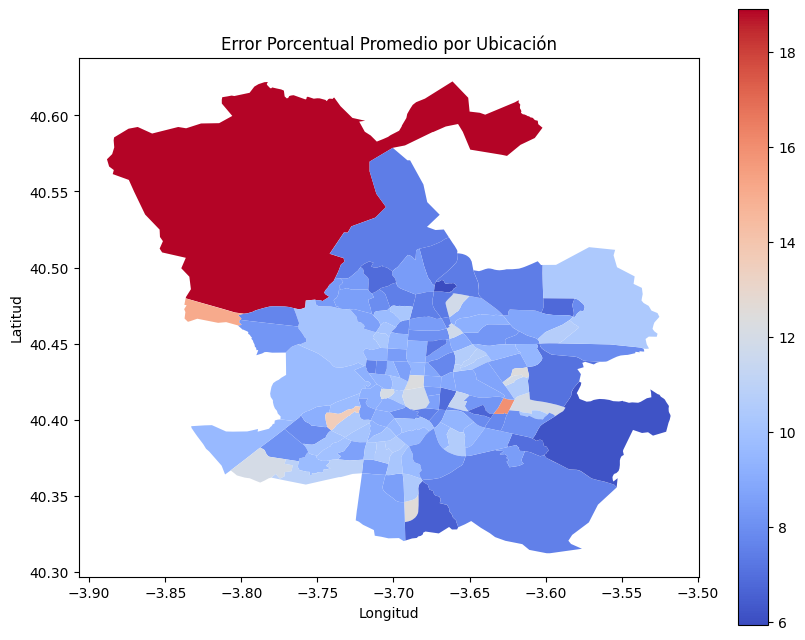

In [ ]:
# Crear un GeoDataFrame a partir de tu DataFrame original
gdf = gpd.GeoDataFrame(df_polygons, geometry=gpd.GeoSeries.from_wkt(df_polygons['WKT']))

# Crear un diccionario para almacenar el error porcentual por ubicación
error_porcentual_por_ubicacion = {}

# Iterar a través de las ubicaciones únicas y calcular el error porcentual para cada una
for ubicacion in ubicaciones_unicas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    # Obtener el número de muestras en la ubicación actual
    poblacion_muestras = len(y_ubicacion)

    # Hacer predicciones para la ubicación actual con el modelo final
    y_pred_ubicacion = modelos_finales_por_ubicacion[ubicacion].predict(datos_ubicacion)

    # Calcular el error porcentual para la ubicación actual
    error_porcentual = (abs(np.exp(y_ubicacion) - np.exp(y_pred_ubicacion)) / np.exp(y_ubicacion)) * 100

    # Almacenar el error porcentual en el diccionario
    error_porcentual_por_ubicacion[ubicacion] = error_porcentual

# Agregar la columna de error porcentual promedio por ubicación
gdf['Error Porcentual Promedio'] = [np.mean(error_porcentual_por_ubicacion.get(ubicacion, [])) for ubicacion in gdf['LOCATIONNAME']]

# Dibujar los polígonos y etiquetar con el error porcentual promedio
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(column='Error Porcentual Promedio', cmap='coolwarm', legend=True, ax=ax)
plt.title('Error Porcentual Promedio por Ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()



Mapa con R2 de segundo modelo

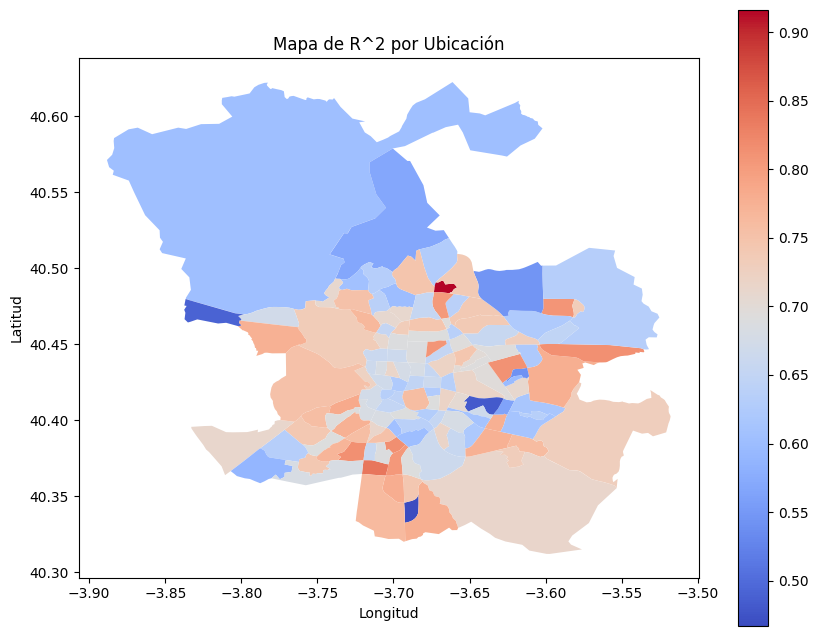

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear un GeoDataFrame a partir de tu DataFrame original de polígonos
gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry=gpd.GeoSeries.from_wkt(df_polygons['WKT']))

# Agregar la columna de R^2 a tu GeoDataFrame
gdf_polygons['R2'] = [estadisticas_por_ubicacion.get(ubicacion, {}).get('R^2', None) for ubicacion in gdf_polygons['LOCATIONNAME']]

# Dibujar los polígonos y colorear según los valores de R^2
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_polygons.plot(column='R2', cmap='coolwarm', legend=True, ax=ax)
plt.title('Mapa de R^2 por Ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


Listado de barrios con mejor resultado de r2 en modelo 2

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Crear una lista única de valores de 'LOCATIONNAME'
ubicaciones_unicas = df['LOCATIONNAME'].unique()

# Crear un diccionario para almacenar las estadísticas del primer modelo por ubicación
estadisticas_modelo1_por_ubicacion = {}

# Crear un diccionario para almacenar las estadísticas del segundo modelo por ubicación
estadisticas_modelo2_por_ubicacion = {}

# Iterar a través de las ubicaciones únicas y calcular estadísticas para cada una
for ubicacion in ubicaciones_unicas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)  # Elimino temporalmente 'LOCATIONNAME'
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    # Obtener el número de muestras en la ubicación actual
    poblacion_muestras = len(y_ubicacion)

    # Hacer predicciones para la ubicación actual con el primer modelo
    y_pred_modelo1_ubicacion = rf_model.predict(datos_ubicacion)

    # Calcular métricas de evaluación para el primer modelo
    mse_modelo1 = np.exp(mean_squared_error(y_ubicacion, y_pred_modelo1_ubicacion))
    r2_modelo1 = r2_score(y_ubicacion, y_pred_modelo1_ubicacion)

    # Hacer predicciones para la ubicación actual con el segundo modelo
    y_pred_modelo2_ubicacion = mejores_modelos_por_ubicacion.get(ubicacion).predict(datos_ubicacion)

    # Calcular métricas de evaluación para el segundo modelo
    mse_modelo2 = np.exp(mean_squared_error(y_ubicacion, y_pred_modelo2_ubicacion))
    r2_modelo2 = r2_score(y_ubicacion, y_pred_modelo2_ubicacion)

    # Almacenar las estadísticas en los diccionarios correspondientes
    estadisticas_modelo1_por_ubicacion[ubicacion] = {'MSE': mse_modelo1, 'R^2': r2_modelo1}
    estadisticas_modelo2_por_ubicacion[ubicacion] = {'MSE': mse_modelo2, 'R^2': r2_modelo2}

    # Agregar temporalmente de nuevo 'LOCATIONNAME'
    datos_ubicacion['LOCATIONNAME'] = ubicacion

# Imprimir las estadísticas para cada ubicación con ambos modelos
for ubicacion in ubicaciones_unicas:
    print(f'Ubicación: {ubicacion}')

    print('Modelo 1:')
    print(f'MSE: {estadisticas_modelo1_por_ubicacion[ubicacion]["MSE"]:.4f}')
    print(f'R^2: {estadisticas_modelo1_por_ubicacion[ubicacion]["R^2"]:.4f}')

    print('Modelo 2:')
    print(f'MSE: {estadisticas_modelo2_por_ubicacion[ubicacion]["MSE"]:.4f}')
    print(f'R^2: {estadisticas_modelo2_por_ubicacion[ubicacion]["R^2"]:.4f}')

    if estadisticas_modelo2_por_ubicacion[ubicacion]["R^2"] > estadisticas_modelo1_por_ubicacion[ubicacion]["R^2"]:
        print(f'R^2 Modelo 2 es mejor que R^2 Modelo 1 en esta ubicación.')

    print()


Ubicación: 12 de Octubre-Orcasur
Modelo 1:
MSE: 1.0222
R^2: 0.8053
Modelo 2:
MSE: 1.0206
R^2: 0.8193
R^2 Modelo 2 es mejor que R^2 Modelo 1 en esta ubicación.

Ubicación: Abrantes
Modelo 1:
MSE: 1.0167
R^2: 0.8140
Modelo 2:
MSE: 1.0130
R^2: 0.8549
R^2 Modelo 2 es mejor que R^2 Modelo 1 en esta ubicación.

Ubicación: Acacias
Modelo 1:
MSE: 1.0229
R^2: 0.6833
Modelo 2:
MSE: 1.0202
R^2: 0.7202
R^2 Modelo 2 es mejor que R^2 Modelo 1 en esta ubicación.

Ubicación: Adelfas
Modelo 1:
MSE: 1.0143
R^2: 0.6532
Modelo 2:
MSE: 1.0134
R^2: 0.6744
R^2 Modelo 2 es mejor que R^2 Modelo 1 en esta ubicación.

Ubicación: Aeropuerto
Modelo 1:
MSE: 1.0237
R^2: 0.6320
Modelo 2:
MSE: 1.0171
R^2: 0.7343
R^2 Modelo 2 es mejor que R^2 Modelo 1 en esta ubicación.

Ubicación: Alameda de Osuna
Modelo 1:
MSE: 1.0107
R^2: 0.6463
Modelo 2:
MSE: 1.0197
R^2: 0.3529

Ubicación: Almagro
Modelo 1:
MSE: 1.0189
R^2: 0.6759
Modelo 2:
MSE: 1.0145
R^2: 0.7504
R^2 Modelo 2 es mejor que R^2 Modelo 1 en esta ubicación.

Ubicación

Modelo 1 vs Modelo 2

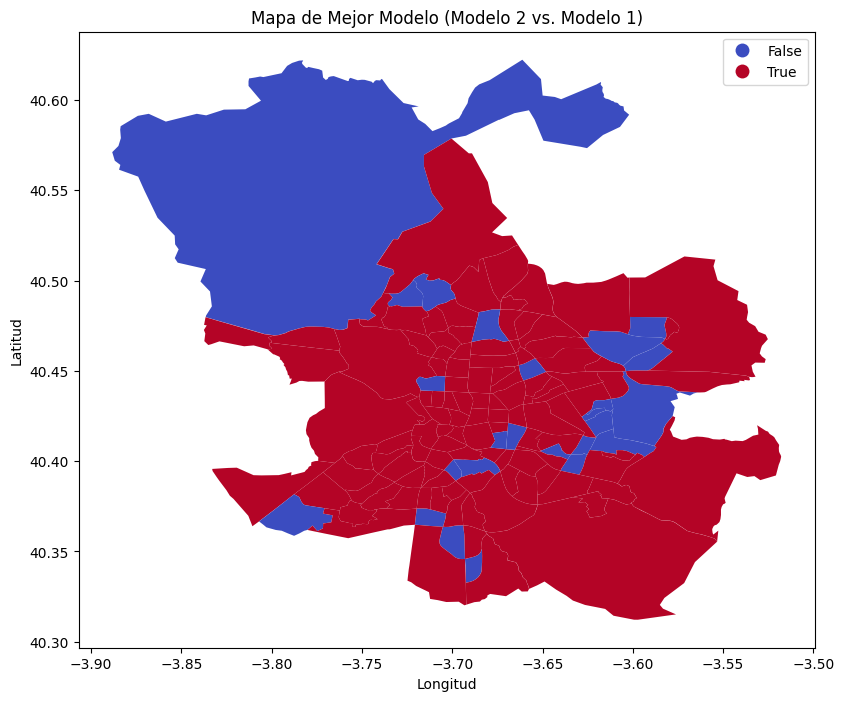

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Crear un GeoDataFrame a partir de tu DataFrame original de polígonos
gdf_polygons = gpd.GeoDataFrame(df_polygons, geometry=gpd.GeoSeries.from_wkt(df_polygons['WKT']))

# Agregar la columna de R^2 del primer modelo a tu GeoDataFrame
gdf_polygons['R2_Modelo1'] = [estadisticas_modelo1_por_ubicacion.get(ubicacion, {}).get('R^2', None) for ubicacion in gdf_polygons['LOCATIONNAME']]

# Agregar la columna de R^2 del segundo modelo a tu GeoDataFrame
gdf_polygons['R2_Modelo2'] = [estadisticas_modelo2_por_ubicacion.get(ubicacion, {}).get('R^2', None) for ubicacion in gdf_polygons['LOCATIONNAME']]

# Crear una columna que indique si el R^2 del segundo modelo es mejor que el del primer modelo
gdf_polygons['Mejor_Modelo2'] = gdf_polygons['R2_Modelo2'] > gdf_polygons['R2_Modelo1']

# Dibujar los polígonos y colorea según si el R^2 del segundo modelo es mejor que el del primer modelo
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_polygons.plot(column='Mejor_Modelo2', cmap='coolwarm', legend=True, ax=ax)
plt.title('Mapa de Mejor Modelo (Modelo 2 vs. Modelo 1)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()


##Unir los dos modelos

<ipython-input-57-6fafb8a1008b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['UNITPRICE'] = np.exp(df_filtrado['UNIT_PRICE_LOG'])
<ipython-input-57-6fafb8a1008b>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, label=f'Ubicación: {ubicacion}', shade=True)
<ipython-input-57-6fafb8a1008b>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, label=f'Ubicación: {ubicacion}', shade=True)
<ipython-input-57-6fafb8a1008b>:18: FutureWarning: 

`shade` is now deprecated in favor of `fil

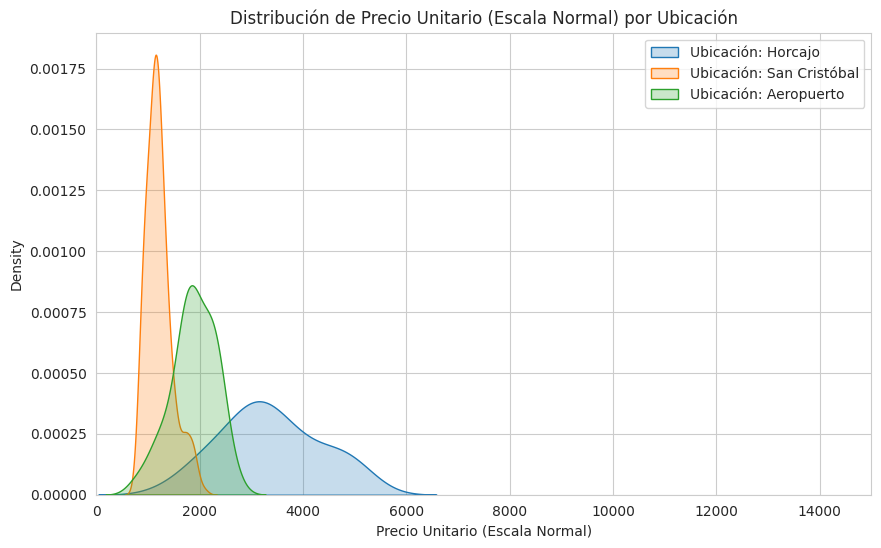

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filtrar el DataFrame para las ubicaciones específicas
ubicaciones_seleccionadas = ['Horcajo', 'San Cristóbal', 'Aeropuerto']
df_filtrado = df[df['LOCATIONNAME'].isin(ubicaciones_seleccionadas)]

# Convertir 'UNIT_PRICE_LOG' a escala normal utilizando la función exponencial
df_filtrado['UNITPRICE'] = np.exp(df_filtrado['UNIT_PRICE_LOG'])

# Crear un gráfico de densidad (KDE) para cada ubicación con diferentes colores
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

for ubicacion in ubicaciones_seleccionadas:
    data = df_filtrado[df_filtrado['LOCATIONNAME'] == ubicacion]['UNITPRICE']
    sns.kdeplot(data, label=f'Ubicación: {ubicacion}', shade=True)

# Añadir etiquetas y límites al gráfico
plt.xlabel('Precio Unitario (Escala Normal)')
plt.xlim([0, 15000])  # Ajusta los límites según tus datos
plt.title('Distribución de Precio Unitario (Escala Normal) por Ubicación')
plt.legend()
plt.show()



59370
14843


<ipython-input-73-d729c9eb4827>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_por_ubicacion = data_por_ubicacion.append(data_ubicacion, ignore_index=True)
<ipython-input-73-d729c9eb4827>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_por_ubicacion = data_por_ubicacion.append(data_ubicacion, ignore_index=True)
<ipython-input-73-d729c9eb4827>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_por_ubicacion = data_por_ubicacion.append(data_ubicacion, ignore_index=True)


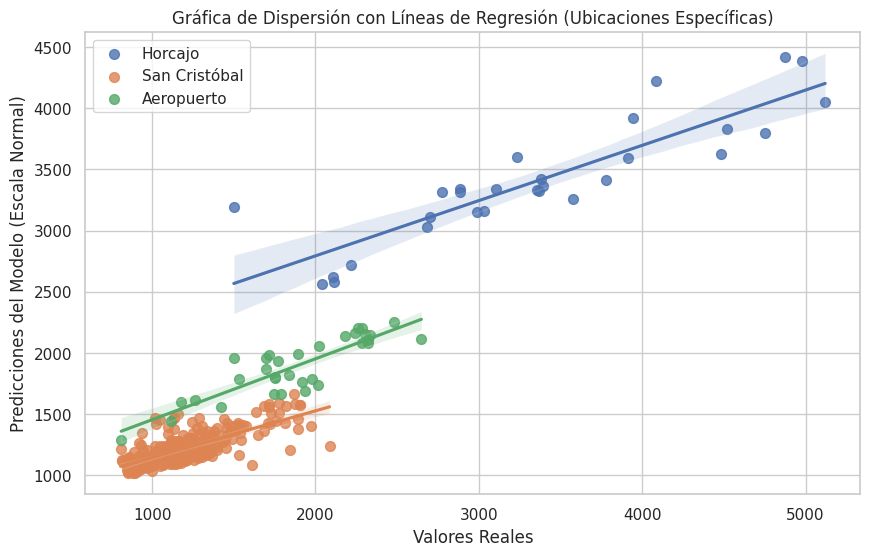

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ubicaciones específicas que deseas incluir
ubicaciones_especificas = ['Horcajo', 'San Cristóbal', 'Aeropuerto']

# Crear un DataFrame para almacenar los datos de cada ubicación
data_por_ubicacion = pd.DataFrame(columns=['Valores Reales', 'Predicciones', 'Ubicación'])

# Iterar a través de las ubicaciones específicas y calcular estadísticas para cada una
for ubicacion in ubicaciones_especificas:
    # Filtrar los datos para la ubicación actual
    datos_ubicacion = X[X['LOCATIONNAME'] == ubicacion].drop('LOCATIONNAME', axis=1)  # Elimino temporalmente 'LOCATIONNAME'
    y_ubicacion = df[df['LOCATIONNAME'] == ubicacion]['UNIT_PRICE_LOG']

    # Hacer predicciones para la ubicación actual
    y_pred_ubicacion = rf_model.predict(datos_ubicacion)

    # Convertir las predicciones logarítmicas a una escala normal
    predicciones_ubicacion = np.exp(y_pred_ubicacion)

    # Almacenar valores reales, predicciones y ubicación en el DataFrame
    data_ubicacion = pd.DataFrame({'Valores Reales': np.exp(y_ubicacion), 'Predicciones': predicciones_ubicacion, 'Ubicación': ubicacion})
    data_por_ubicacion = data_por_ubicacion.append(data_ubicacion, ignore_index=True)

# Crear la gráfica de dispersión con líneas de regresión separadas por ubicación
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

for ubicacion in ubicaciones_especificas:
    data_ubicacion = data_por_ubicacion[data_por_ubicacion['Ubicación'] == ubicacion]
    sns.regplot(x='Valores Reales', y='Predicciones', data=data_ubicacion, label=ubicacion, scatter_kws={'s': 50})

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo (Escala Normal)')
plt.title('Gráfica de Dispersión con Líneas de Regresión (Ubicaciones Específicas)')
plt.legend()
plt.show()

